In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
df = pd.read_csv('titanic.csv')


In [8]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df['Sex'].value_counts()
df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Count')

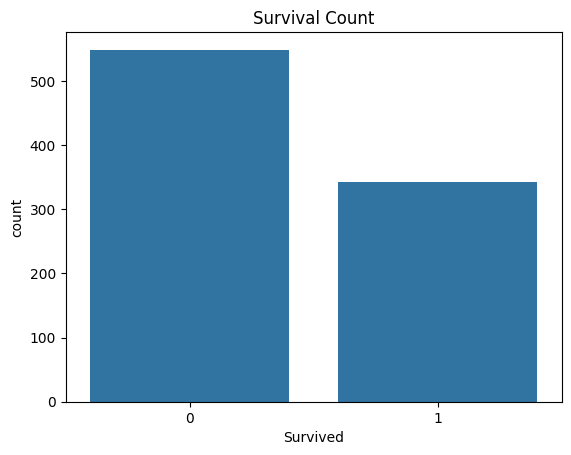

In [14]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")


There are more passengers who did not survive (label 0) compared to those who survived (label 1).
The ship had a higher fatality rate than survival rate.

sns.pairplot(df.dropna(), hue='Survived', vars=['Pclass', 'Age', 'Fare'])


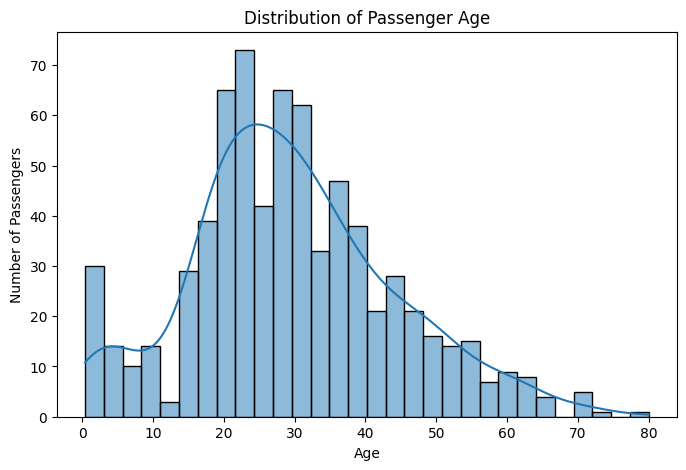

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Distribution of Passenger Age")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()



Most passengers are between 20 and 40 years old. Very few are children below 10 or elderly above 60.

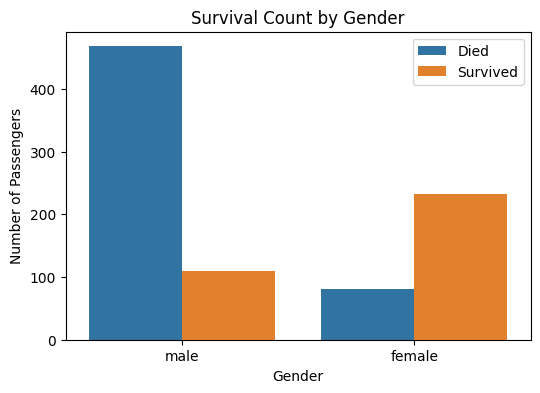

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(labels=['Died', 'Survived'])
plt.show()


A much higher number of females survived compared to males.

Very few males survived in comparison to the number who died.

This supports the "women and children first" policy followed during evacuation.

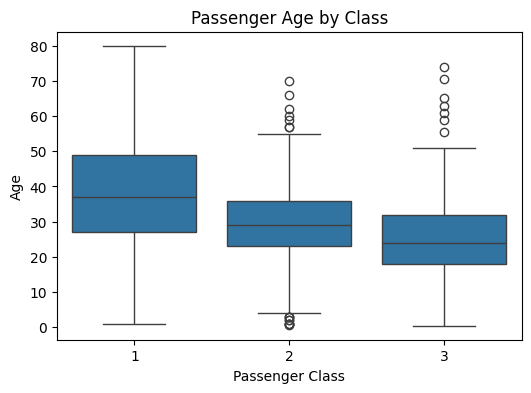

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Passenger Age by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()


First class passengers tend to be older, while third class includes many young passengers 

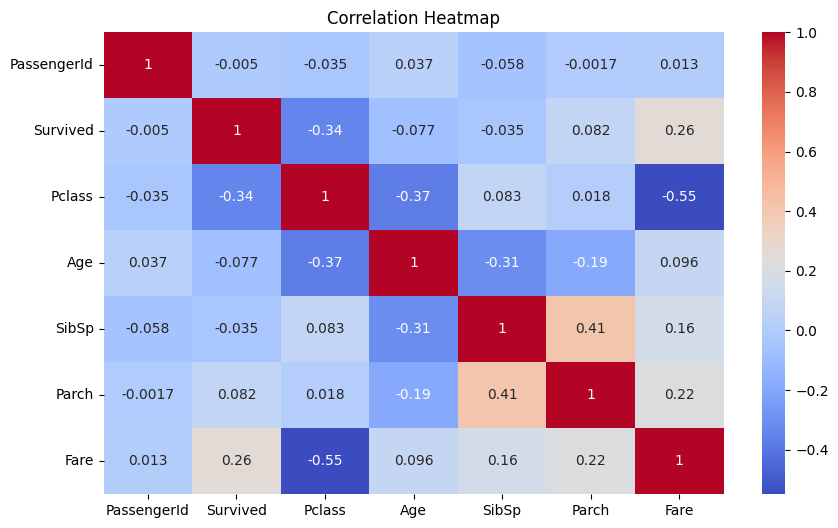

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Fare has a positive correlation with Survived (wealthier passengers were more likely to survive).

Pclass has a negative correlation with Survived (higher class number = lower survival chance).

Age has almost no strong correlation with survival.

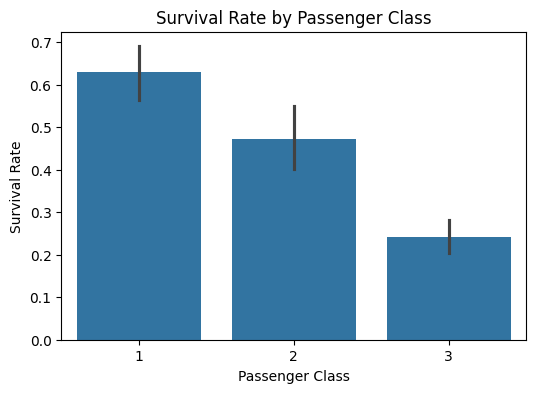

In [25]:

plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


Survival rate was highest in 1st class and lowest in 3rd class. This shows class influenced the chances of survival.


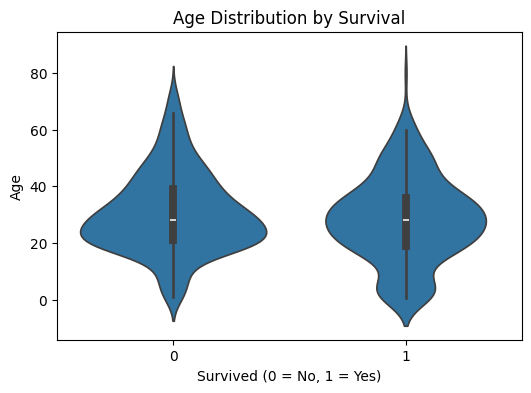

In [26]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


Younger passengers had a slightly higher survival rate. The distribution shows more survivors around 20–40 years old.


           Final Summary

Most passengers were between 20 and 40 years old

More males died, while females had a higher survival rate

First-class passengers were generally older and had higher chances of survival

Passengers who paid higher fares were more likely to survive

There is a clear influence of gender, class, and fare on survival

The "women and children first" policy appears to have been followed during evacuation

